## 1) importing modules and data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


import os 
from scipy.sparse import  coo_matrix


### step 1: data loading and preprocesing

In [2]:
train_data= pd.read_csv("marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [3]:
train_data.head()

Uniq Id            Crawl Timestamp  \
0  1705736792d82aa2f2d3caf1c07c53f4  2020-09-24 03:21:12 +0000   
1  95a9fe6f4810fcfc7ff244fd06784f11  2020-10-30 14:04:08 +0000   
2  8d4d0330178d3ed181b15a4102b287f2  2020-08-06 05:51:47 +0000   
3  fddc4df45b35efd886794b261f730c51  2020-07-15 11:22:04 +0000   
4  0990cf89a59ca6a0460349a3e4f51d42  2020-11-26T12:27:20+00:00   

   Dataset Origin                        Product Id  Product Barcode  \
0             NaN  2e17bf4acecdece67fc00f07ad62c910              NaN   
1             NaN  076e5854a62dd283c253d6bae415af1f              NaN   
2             NaN  8a4fe5d9c7a6ed26cc44d785a454b124              NaN   
3             NaN  03b5fb878a33eadff8b033419eab9669              NaN   
4             NaN  ce3d761e57d6ccad80619297b5b1bcbc              NaN   

  Product Company Type Source Product Brand Source  \
0                  Competitor                  NaN   
1                  Competitor                  NaN   
2                  Competitor                  NaN   
3                  Competitor                  NaN   
4                  Competitor                  NaN   

  Product Brand Normalised Source Product Name Source  Match Rank  ...  \
0                             NaN                 NaN         NaN  ...   
1                             NaN                 NaN         NaN  ...   
2                             NaN                 NaN         NaN  ...   
3                             NaN                 NaN         NaN  ...   
4                             NaN                 NaN         NaN  ...   

   Product Currency  Product Available Inventory  \
0               USD                    111111111   
1               USD                    111111111   
2               USD                    111111111   
3               USD                    111111111   
4               USD                    111111111   

                                   Product Image Url Product Model Number  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...                  NaN   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...                  NaN   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...                  NaN   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...                  NaN   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...                  NaN   

                                        Product Tags Product Contents  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...              NaN   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...              NaN   
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...              NaN   
3  Kokie Professional Matte Lipstick, Hot Berry, ...              NaN   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...              NaN   

   Product Rating  Product Reviews Count  Bsr  \
0             NaN                    NaN  NaN   
1             NaN                    NaN  NaN   
2             4.5                29221.0  NaN   
3             NaN                    NaN  NaN   
4             NaN                  131.0  NaN   

                        Joining Key  
0  81350af1be98d3753cf964709f0c766a  
1  0353e63907dc0de0c734db4690300057  
2  b6985c8e94815fbca2319dbb8bf228af  
3  85b70fded09186f00467cea2f935b779  
4  41c870871328e97da6fb036bb7d4b2da  

[5 rows x 32 columns]

In [6]:
train_data["Product Tags"].head()

0    OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1    Nice 'n Easy Permanent Color, 111 Natural Medi...
2    Clairol Nice 'N Easy Permanent Color 7/106A Na...
3    Kokie Professional Matte Lipstick, Hot Berry, ...
4    Gillette TRAC II Plus Razor Blade Refills, Fit...
Name: Product Tags, dtype: object

In [7]:
train_data.shape

(5000, 32)

In [8]:
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


#### extracting important colums

In [9]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head()

Uniq Id                        Product Id  \
0  1705736792d82aa2f2d3caf1c07c53f4  2e17bf4acecdece67fc00f07ad62c910   
1  95a9fe6f4810fcfc7ff244fd06784f11  076e5854a62dd283c253d6bae415af1f   
2  8d4d0330178d3ed181b15a4102b287f2  8a4fe5d9c7a6ed26cc44d785a454b124   
3  fddc4df45b35efd886794b261f730c51  03b5fb878a33eadff8b033419eab9669   
4  0990cf89a59ca6a0460349a3e4f51d42  ce3d761e57d6ccad80619297b5b1bcbc   

   Product Rating  Product Reviews Count  \
0             NaN                    NaN   
1             NaN                    NaN   
2             4.5                29221.0   
3             NaN                    NaN   
4             NaN                  131.0   

                                    Product Category    Product Brand  \
0  Premium Beauty > Premium Makeup > Premium Nail...              OPI   
1  Beauty > Hair Care > Hair Color > Auburn Hair ...      Nice'n Easy   
2  Beauty > Hair Care > Hair Color > Permanent Ha...          Clairol   
3                              Beauty > Makeup > Lip  Kokie Cosmetics   
4  Seasonal > Stock Up Essentials > Personal Care...         Gillette   

                                        Product Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                   Product Image Url  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                 Product Description  \
0                                                NaN   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   
3  Calling all matte lip lovers! Indulge in our r...   
4  In 1971, Gillette introduced the Trac II razor...   

                                        Product Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

In [11]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

#### --Handling the nan values

In [13]:
train_data["Product Rating"].fillna(0, inplace=True)
train_data["Product Reviews Count"].fillna(0, inplace=True)
train_data["Product Category"].fillna("",inplace=True)
train_data["Product Brand"].fillna("", inplace=True)
train_data["Product Description"].fillna("", inplace=True)


/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/619528969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Product Rating"].fillna(0, inplace=True)
/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/619528969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Product Rating"].fillna(0,

In [14]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [17]:
# checking the dublicate data
print(f"the number of dublicate data is {train_data.duplicated().sum()}")

the number of dublicate data is 0


In [18]:
#renaming the column
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

train_data.rename(columns=column_name_mapping, inplace=True)

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/459752758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns=column_name_mapping, inplace=True)


In [20]:
train_data.head()

ID                            ProdID  Rating  \
0  1705736792d82aa2f2d3caf1c07c53f4  2e17bf4acecdece67fc00f07ad62c910     0.0   
1  95a9fe6f4810fcfc7ff244fd06784f11  076e5854a62dd283c253d6bae415af1f     0.0   
2  8d4d0330178d3ed181b15a4102b287f2  8a4fe5d9c7a6ed26cc44d785a454b124     4.5   
3  fddc4df45b35efd886794b261f730c51  03b5fb878a33eadff8b033419eab9669     0.0   
4  0990cf89a59ca6a0460349a3e4f51d42  ce3d761e57d6ccad80619297b5b1bcbc     0.0   

   ReviewCount                                           Category  \
0          0.0  Premium Beauty > Premium Makeup > Premium Nail...   
1          0.0  Beauty > Hair Care > Hair Color > Auburn Hair ...   
2      29221.0  Beauty > Hair Care > Hair Color > Permanent Ha...   
3          0.0                              Beauty > Makeup > Lip   
4        131.0  Seasonal > Stock Up Essentials > Personal Care...   

             Brand                                               Name  \
0              OPI  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1      Nice'n Easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2          Clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   
4         Gillette  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                         Description  \
0                                                      
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   
3  Calling all matte lip lovers! Indulge in our r...   
4  In 1971, Gillette introduced the Trac II razor...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

In [22]:
train_data["ID"] = train_data["ID"].str.extract(r'(\d+)').astype(float)
train_data["ProdID"] = train_data["ProdID"].str.extract(r'(\d+)').astype(float)

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/2746595591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["ID"] = train_data["ID"].str.extract(r'(\d+)').astype(float)
/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/2746595591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["ProdID"] = train_data["ProdID"].str.extract(r'(\d+)').astype(float)


In [37]:
train_data.head(10)

ID        ProdID  Rating  ReviewCount  \
0  1.705737e+09  2.000000e+00     0.0          0.0   
1  9.500000e+01  7.600000e+01     0.0          0.0   
2  8.000000e+00  8.000000e+00     4.5      29221.0   
3  4.000000e+00  3.000000e+00     0.0          0.0   
4  9.900000e+02  3.000000e+00     0.0        131.0   
5  2.620000e+02  7.569141e+09     4.6         52.0   
6  5.224642e+09  3.710000e+02     4.3         10.0   
7  6.000000e+00  0.000000e+00     0.0          0.0   
8  5.070000e+02  1.007940e+42     5.0          1.0   
9  3.200000e+01  1.030521e+42     0.0        950.0   

                                            Category            Brand  \
0  Premium Beauty > Premium Makeup > Premium Nail...              OPI   
1  Beauty > Hair Care > Hair Color > Auburn Hair ...      Nice'n Easy   
2  Beauty > Hair Care > Hair Color > Permanent Ha...          Clairol   
3                              Beauty > Makeup > Lip  Kokie Cosmetics   
4  Seasonal > Stock Up Essentials > Personal Care...         Gillette   
5  Beauty > Hair Care > Hair Care Brands > Old Sp...        Old Spice   
6         Personal Care > Oral Care > Kids Oral Care          Colgate   
7                            Beauty > Makeup > Nails              BMC   
8      Beauty > Hair Care > Hair Care Brands > Suave            Suave   
9                       Health > Lip Care > Vaseline         Vaseline   

                                                Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   
5  Old Spice Artisan Styling High Hold Matte Fini...   
6  Colgate My First Baby and Toddler Toothpaste, ...   
7  BMC Bright and Loud Cream Gel Lacquer Polish S...   
8  Suave Extra Hold 7 Shaping Mousse 9 oz (Pack o...   
9  (3 pack) Vaseline Lip Therapy Tinted Lip Balm ...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   
5  https://i5.walmartimages.com/asr/73214b95-72ce...   
6  https://i5.walmartimages.com/asr/d28b16f4-1bd4...   
7  https://i5.walmartimages.com/asr/93f8bbf3-2dfd...   
8  https://i5.walmartimages.com/asr/05f5ba16-335d...   
9  https://i5.walmartimages.com/asr/6fced36e-5459...   

                                         Description  \
0                                                      
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   
3  Calling all matte lip lovers! Indulge in our r...   
4  In 1971, Gillette introduced the Trac II razor...   
5  Old Spice Artisan Molding Clay is a Mens Styli...   
6  Colgate My First Baby and Toddler Toothpaste i...   
7  Lights, Sick Beats, and Epic Gel Polish! We pr...   
8  Free Shipping Pack of 6 Pack of 6 for the UPC:...   
9  Vaseline Lip Therapy Lip Balm Mini Rosy is cli...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...  
5  Old Spice Artisan Styling High Hold Matte Fini...  
6  Colgate My First Baby and Toddler Toothpaste, ...  
7  BMC Bright and Loud Cream Gel Lacquer Polish S...  
8  Suave Extra Hold 7 Shaping Mousse 9 oz (Pack o...  
9  (3 pack) Vaseline Lip Therapy Tinted Lip Balm ...

#### EDA

In [25]:
num_user = train_data["ID"].nunique()
num_iters = train_data["ProdID"].nunique()
num_rating = train_data["Rating"].nunique()
print(f"the number of unique id : {num_user}")
print(f"the number of unique user is : {num_user}")
print(f"the number of unique rating : {num_rating}")


the number of unique id : 1721
the number of unique user is : 1721
the number of unique rating : 36


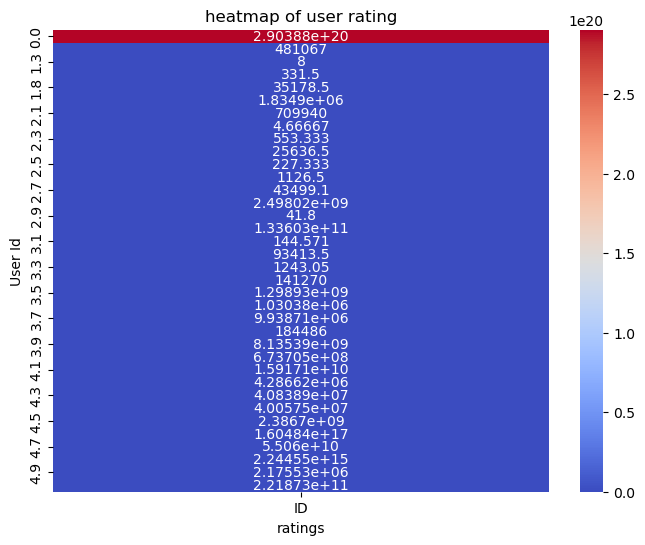

In [32]:
# pivote the dataframe
heatmap  = train_data.pivot_table("ID","Rating")


#creating the headmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title("heatmap of user rating")
plt.xlabel("ratings")
plt.ylabel("User Id")
plt.show()

In [33]:
heatmap

ID
Rating              
0.0     2.903881e+20
1.0     4.810669e+05
1.3     8.000000e+00
1.5     3.315000e+02
1.8     3.517850e+04
2.0     1.834903e+06
2.1     7.099400e+05
2.2     4.666667e+00
2.3     5.533333e+02
2.4     2.563650e+04
2.5     2.273333e+02
2.6     1.126500e+03
2.7     4.349914e+04
2.8     2.498022e+09
2.9     4.180000e+01
3.0     1.336033e+11
3.1     1.445714e+02
3.2     9.341350e+04
3.3     1.243053e+03
3.4     1.412698e+05
3.5     1.298932e+09
3.6     1.030382e+06
3.7     9.938708e+06
3.8     1.844865e+05
3.9     8.135387e+09
4.0     6.737047e+08
4.1     1.591707e+10
4.2     4.286624e+06
4.3     4.083889e+07
4.4     4.005745e+07
4.5     2.386698e+09
4.6     1.604843e+17
4.7     5.506001e+10
4.8     2.244548e+15
4.9     2.175527e+06
5.0     2.218733e+11

In [36]:
train_data["ID"].value_counts()

ID
7.0        224
2.0        218
6.0        214
8.0        206
0.0        204
          ... 
6452.0       1
57685.0      1
3419.0       1
708.0        1
2771.0       1
Name: count, Length: 1721, dtype: int64

In [38]:
train_data["ProdID"].value_counts()

ProdID
3.0          214
9.0          204
1.0          200
5.0          199
0.0          196
            ... 
31305.0        1
1897.0         1
484.0          1
8111776.0      1
208.0          1
Name: count, Length: 1697, dtype: int64

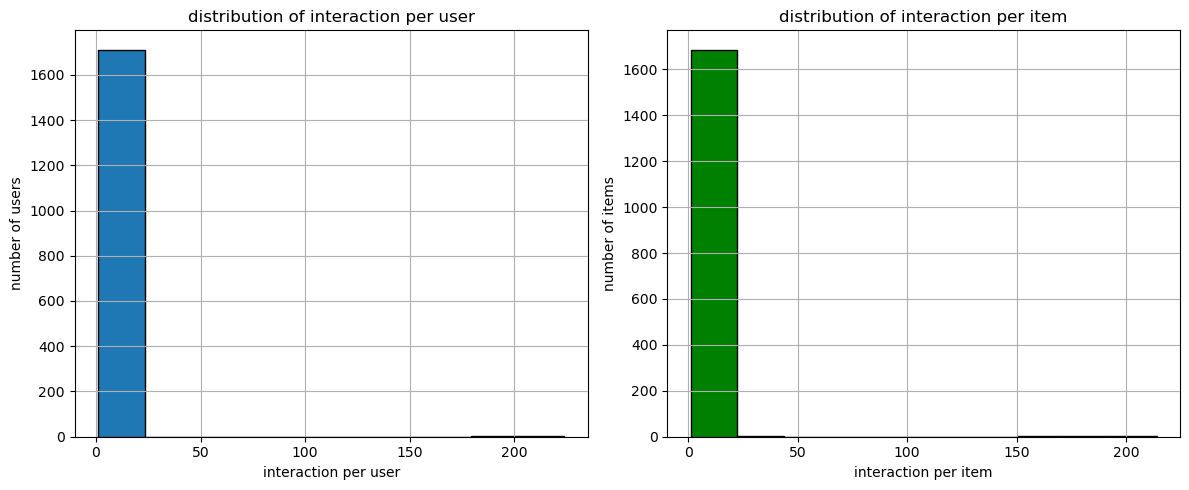

In [34]:
# distribution of interaction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data["ID"].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel("interaction per user")
plt.ylabel("number of users")
plt.title("distribution of interaction per user")

plt.subplot(1, 2, 2)
train_data["ProdID"].value_counts().hist(bins=10, edgecolor='k', color="green")
plt.xlabel("interaction per item")
plt.ylabel("number of items")
plt.title("distribution of interaction per item")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'top 5 Most Popular Items')

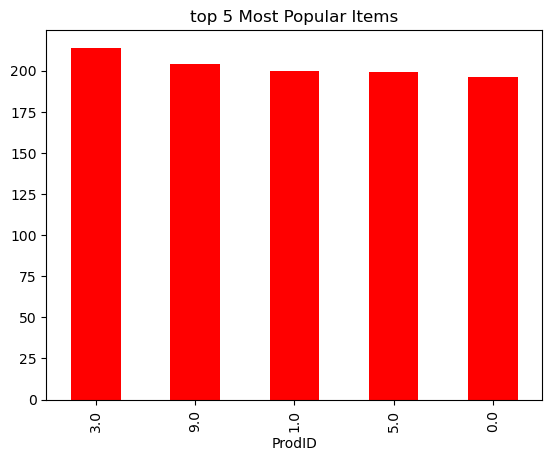

In [43]:
# top 5 most popular items
popular_items = train_data["ProdID"].value_counts().head(5)
popular_items.plot(kind="bar", color="red")
plt.title("top 5 Most Popular Items")


Text(0.5, 1.0, 'top 5 most rated product')

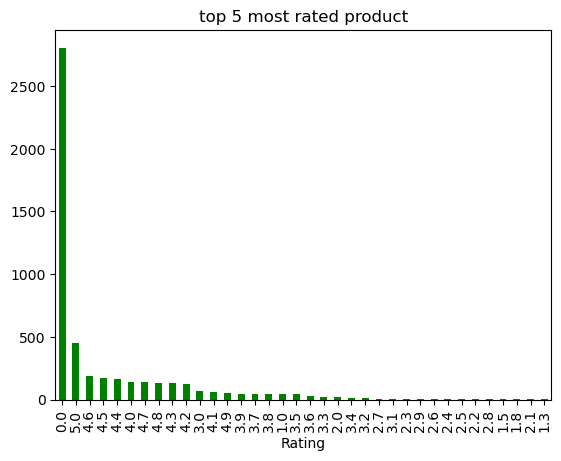

In [47]:
# most rated products
most_rated_products = train_data["Rating"].value_counts()
most_rated_products.plot(kind="bar",color="green")
plt.title("top 5 most rated product")

#### data clearning and tag creation

In [51]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

In [55]:
def clean_and_extract(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)


colums_to_extract_tags_from = ["Category", "Brand", "Description"]

for column in colums_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract)

In [56]:
train_data.head()

ID  ProdID  Rating  ReviewCount  \
0  1.705737e+09     2.0     0.0          0.0   
1  9.500000e+01    76.0     0.0          0.0   
2  8.000000e+00     8.0     4.5      29221.0   
3  4.000000e+00     3.0     0.0          0.0   
4  9.900000e+02     3.0     0.0        131.0   

                                            Category             Brand  \
0  premium, beauty, premium, makeup, premium, nai...               opi   
1  beauty, hair, care, hair, color, auburn, hair,...              easy   
2  beauty, hair, care, hair, color, permanent, ha...           clairol   
3                                beauty, makeup, lip  kokie, cosmetics   
4  seasonal, stock, essentials, personal, care, s...          gillette   

                                                Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                         Description  \
0                                                      
1  pack, 3, pack, 3, upc, 381519000201, beautiful...   
2  clairol, nice, n, easy, permanent, color, give...   
3  calling, matte, lip, lovers, indulge, rich, cr...   
4  1971, gillette, introduced, trac, ii, razor, s...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

In [57]:
# saving the data for further user
train_data.to_csv("preporcess_data_1.csv")

In [3]:
train_data= pd.read_csv("preporcess_data_1.csv")
train_data.head()

Unnamed: 0            ID  ProdID  Rating  ReviewCount  \
0           0  1.705737e+09     2.0     0.0          0.0   
1           1  9.500000e+01    76.0     0.0          0.0   
2           2  8.000000e+00     8.0     4.5      29221.0   
3           3  4.000000e+00     3.0     0.0          0.0   
4           4  9.900000e+02     3.0     0.0        131.0   

                                            Category             Brand  \
0  premium, beauty, premium, makeup, premium, nai...               opi   
1  beauty, hair, care, hair, color, auburn, hair,...              easy   
2  beauty, hair, care, hair, color, permanent, ha...           clairol   
3                                beauty, makeup, lip  kokie, cosmetics   
4  seasonal, stock, essentials, personal, care, s...          gillette   

                                                Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                         Description  \
0                                                NaN   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...   
2  clairol, nice, n, easy, permanent, color, give...   
3  calling, matte, lip, lovers, indulge, rich, cr...   
4  1971, gillette, introduced, trac, ii, razor, s...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

## Rating  based Recomedation model

In [4]:
#by doing the below we group the data based on the mean rating of the product
average_rating = train_data.groupby(["Name","ReviewCount","Brand","ImageURL"])["Rating"].mean().reset_index()

In [5]:
average_rating

Name  ReviewCount  \
0     $6 Mail-In Rebate Available Braun Epilator Sil...        146.0   
1     ($100 Value) Peter Thomas Roth Thermal Therapy...          1.0   
2     ($11 Value) Love Beauty and Planet Coconut Wat...        278.0   
3     ($125 Value) Impressions Vanity Touch Pro LED ...          2.0   
4     ($129 Value) CHI G2 Ceramic Titanium Infused H...         23.0   
...                                                 ...          ...   
4866  wet n wild Photo Focus Correcting Palette, Col...         12.0   
4867  wet n wild Photo Focus Liquid Foundation, Medi...       7827.0   
4868   wet n wild Photo Focus Pressed Powder, Dark Café        635.0   
4869  wet n wild Silk Finish Lipstick, Honolulu Is C...       4259.0   
4870                     wnw i-shimmer eyepencil sky li          0.0   

                     Brand                                           ImageURL  \
0                    braun  https://i5.walmartimages.com/asr/c7d78838-e8e2...   
1      peter, thomas, roth  https://i5.walmartimages.com/asr/ecd851ef-6ca7...   
2     love, beauty, planet  https://i5.walmartimages.com/asr/0348d82d-2a13...   
3      impressions, vanity  https://i5.walmartimages.com/asr/b886b154-97fd...   
4                      chi  https://i5.walmartimages.com/asr/9bcc0ed7-d62c...   
...                    ...                                                ...   
4866          wet, n, wild  https://i5.walmartimages.com/asr/750275fb-ccfa...   
4867          wet, n, wild  https://i5.walmartimages.com/asr/c2c5dc7e-9bbb...   
4868          wet, n, wild  https://i5.walmartimages.com/asr/57bd497f-0d5c...   
4869          wet, n, wild  https://i5.walmartimages.com/asr/0e25f705-a924...   
4870          wet, n, wild  https://i5.walmartimages.com/asr/806e2816-e092...   

      Rating  
0        4.5  
1        5.0  
2        0.0  
3        2.5  
4        4.4  
...      ...  
4866     3.3  
4867     0.0  
4868     4.2  
4869     3.9  
4870     0.0  

[4871 rows x 5 columns]

In [6]:
#sorting the above data based on rating
top_rated_items = average_rating.sort_values(by="Rating", ascending=False)

In [7]:
#getting the top 10 products
top_rated_items.head(10)   

Name  ReviewCount  \
4275  Summers Eve Feminine Deodorant Spray Island Sp...          3.0   
4622           Vitamin E Beauty 14,000 IU Skin Oil 1 oz          3.0   
4627  W8Less Plus Spray, Gel, Firm Hold By Rusk, 5.3 Oz          1.0   
458        Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz          1.0   
3697           Pureology Hydrating Conditioner, 33.8 Oz         13.0   
460                               Air Freshener Febreze          2.0   
4624            Volu Volume Enhancing Softening Shampoo          1.0   
1387  Daily Conditioner Conditionneur Quotidien 11.8...          1.0   
469   Air Wick Freshmatic Refill Automatic Spray, Pa...          2.0   
3696     Pureology Curl Complete Uplifting Curl, 6.8 Oz          3.0   

            Brand                                           ImageURL  Rating  
4275  summer, eve  https://i5.walmartimages.com/asr/49694d47-bfaa...     5.0  
4622        jason  https://i5.walmartimages.com/asr/5db537a7-7117...     5.0  
4627         rusk  https://i5.walmartimages.com/asr/8a8f22e9-d560...     5.0  
458         ahava  https://i5.walmartimages.com/asr/cf65dfb4-5e5f...     5.0  
3697    pureology  https://i5.walmartimages.com/asr/909554f4-cc0a...     5.0  
460       febreze  https://i5.walmartimages.com/asr/61f581e6-c5dd...     5.0  
4624      davines  https://i5.walmartimages.com/asr/e667c965-1f6a...     5.0  
1387       reuzel  https://i5.walmartimages.com/asr/6ff7f6aa-35d6...     5.0  
469     air, wick  https://i5.walmartimages.com/asr/c75274f5-3ad9...     5.0  
3696    pureology  https://i5.walmartimages.com/asr/59e21d68-53db...     5.0

In [8]:
rating_based_recomendation = top_rated_items.head(10)

In [9]:
rating_based_recomendation["Rating"] = rating_based_recomendation["Rating"].astype(int)
rating_based_recomendation["ReviewCount"] = rating_based_recomendation["ReviewCount"].astype(int)

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_80411/2153032461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation["Rating"] = rating_based_recomendation["Rating"].astype(int)
/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_80411/2153032461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation["ReviewCount"] = rating_based_recomendation["ReviewCount"].astype(int)


In [10]:
rating_based_recomendation

Name  ReviewCount  \
4275  Summers Eve Feminine Deodorant Spray Island Sp...            3   
4622           Vitamin E Beauty 14,000 IU Skin Oil 1 oz            3   
4627  W8Less Plus Spray, Gel, Firm Hold By Rusk, 5.3 Oz            1   
458        Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz            1   
3697           Pureology Hydrating Conditioner, 33.8 Oz           13   
460                               Air Freshener Febreze            2   
4624            Volu Volume Enhancing Softening Shampoo            1   
1387  Daily Conditioner Conditionneur Quotidien 11.8...            1   
469   Air Wick Freshmatic Refill Automatic Spray, Pa...            2   
3696     Pureology Curl Complete Uplifting Curl, 6.8 Oz            3   

            Brand                                           ImageURL  Rating  
4275  summer, eve  https://i5.walmartimages.com/asr/49694d47-bfaa...       5  
4622        jason  https://i5.walmartimages.com/asr/5db537a7-7117...       5  
4627         rusk  https://i5.walmartimages.com/asr/8a8f22e9-d560...       5  
458         ahava  https://i5.walmartimages.com/asr/cf65dfb4-5e5f...       5  
3697    pureology  https://i5.walmartimages.com/asr/909554f4-cc0a...       5  
460       febreze  https://i5.walmartimages.com/asr/61f581e6-c5dd...       5  
4624      davines  https://i5.walmartimages.com/asr/e667c965-1f6a...       5  
1387       reuzel  https://i5.walmartimages.com/asr/6ff7f6aa-35d6...       5  
469     air, wick  https://i5.walmartimages.com/asr/c75274f5-3ad9...       5  
3696    pureology  https://i5.walmartimages.com/asr/59e21d68-53db...       5

In [11]:
print("Rating Based Recomender System : ")
rating_based_recomendation[["Name", "Rating","ReviewCount","Brand","ImageURL"]] = rating_based_recomendation[["Name", "Rating","ReviewCount","Brand","ImageURL"]]
rating_based_recomendation

Rating Based Recomender System : 


/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_80411/2637756929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation[["Name", "Rating","ReviewCount","Brand","ImageURL"]] = rating_based_recomendation[["Name", "Rating","ReviewCount","Brand","ImageURL"]]


Name  ReviewCount  \
4275  Summers Eve Feminine Deodorant Spray Island Sp...            3   
4622           Vitamin E Beauty 14,000 IU Skin Oil 1 oz            3   
4627  W8Less Plus Spray, Gel, Firm Hold By Rusk, 5.3 Oz            1   
458        Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz            1   
3697           Pureology Hydrating Conditioner, 33.8 Oz           13   
460                               Air Freshener Febreze            2   
4624            Volu Volume Enhancing Softening Shampoo            1   
1387  Daily Conditioner Conditionneur Quotidien 11.8...            1   
469   Air Wick Freshmatic Refill Automatic Spray, Pa...            2   
3696     Pureology Curl Complete Uplifting Curl, 6.8 Oz            3   

            Brand                                           ImageURL  Rating  
4275  summer, eve  https://i5.walmartimages.com/asr/49694d47-bfaa...       5  
4622        jason  https://i5.walmartimages.com/asr/5db537a7-7117...       5  
4627         rusk  https://i5.walmartimages.com/asr/8a8f22e9-d560...       5  
458         ahava  https://i5.walmartimages.com/asr/cf65dfb4-5e5f...       5  
3697    pureology  https://i5.walmartimages.com/asr/909554f4-cc0a...       5  
460       febreze  https://i5.walmartimages.com/asr/61f581e6-c5dd...       5  
4624      davines  https://i5.walmartimages.com/asr/e667c965-1f6a...       5  
1387       reuzel  https://i5.walmartimages.com/asr/6ff7f6aa-35d6...       5  
469     air, wick  https://i5.walmartimages.com/asr/c75274f5-3ad9...       5  
3696    pureology  https://i5.walmartimages.com/asr/59e21d68-53db...       5

# contenet based recomendation model (user preferances)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [13]:
train_data.head(2)


Unnamed: 0            ID  ProdID  Rating  ReviewCount  \
0           0  1.705737e+09     2.0     0.0          0.0   
1           1  9.500000e+01    76.0     0.0          0.0   

                                            Category Brand  \
0  premium, beauty, premium, makeup, premium, nai...   opi   
1  beauty, hair, care, hair, color, auburn, hair,...  easy   

                                                Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   

                                         Description  \
0                                                NaN   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...

![Screenshot 2024-09-12 at 9.41.54 PM.png](<attachment:Screenshot 2024-09-12 at 9.41.54 PM.png>)
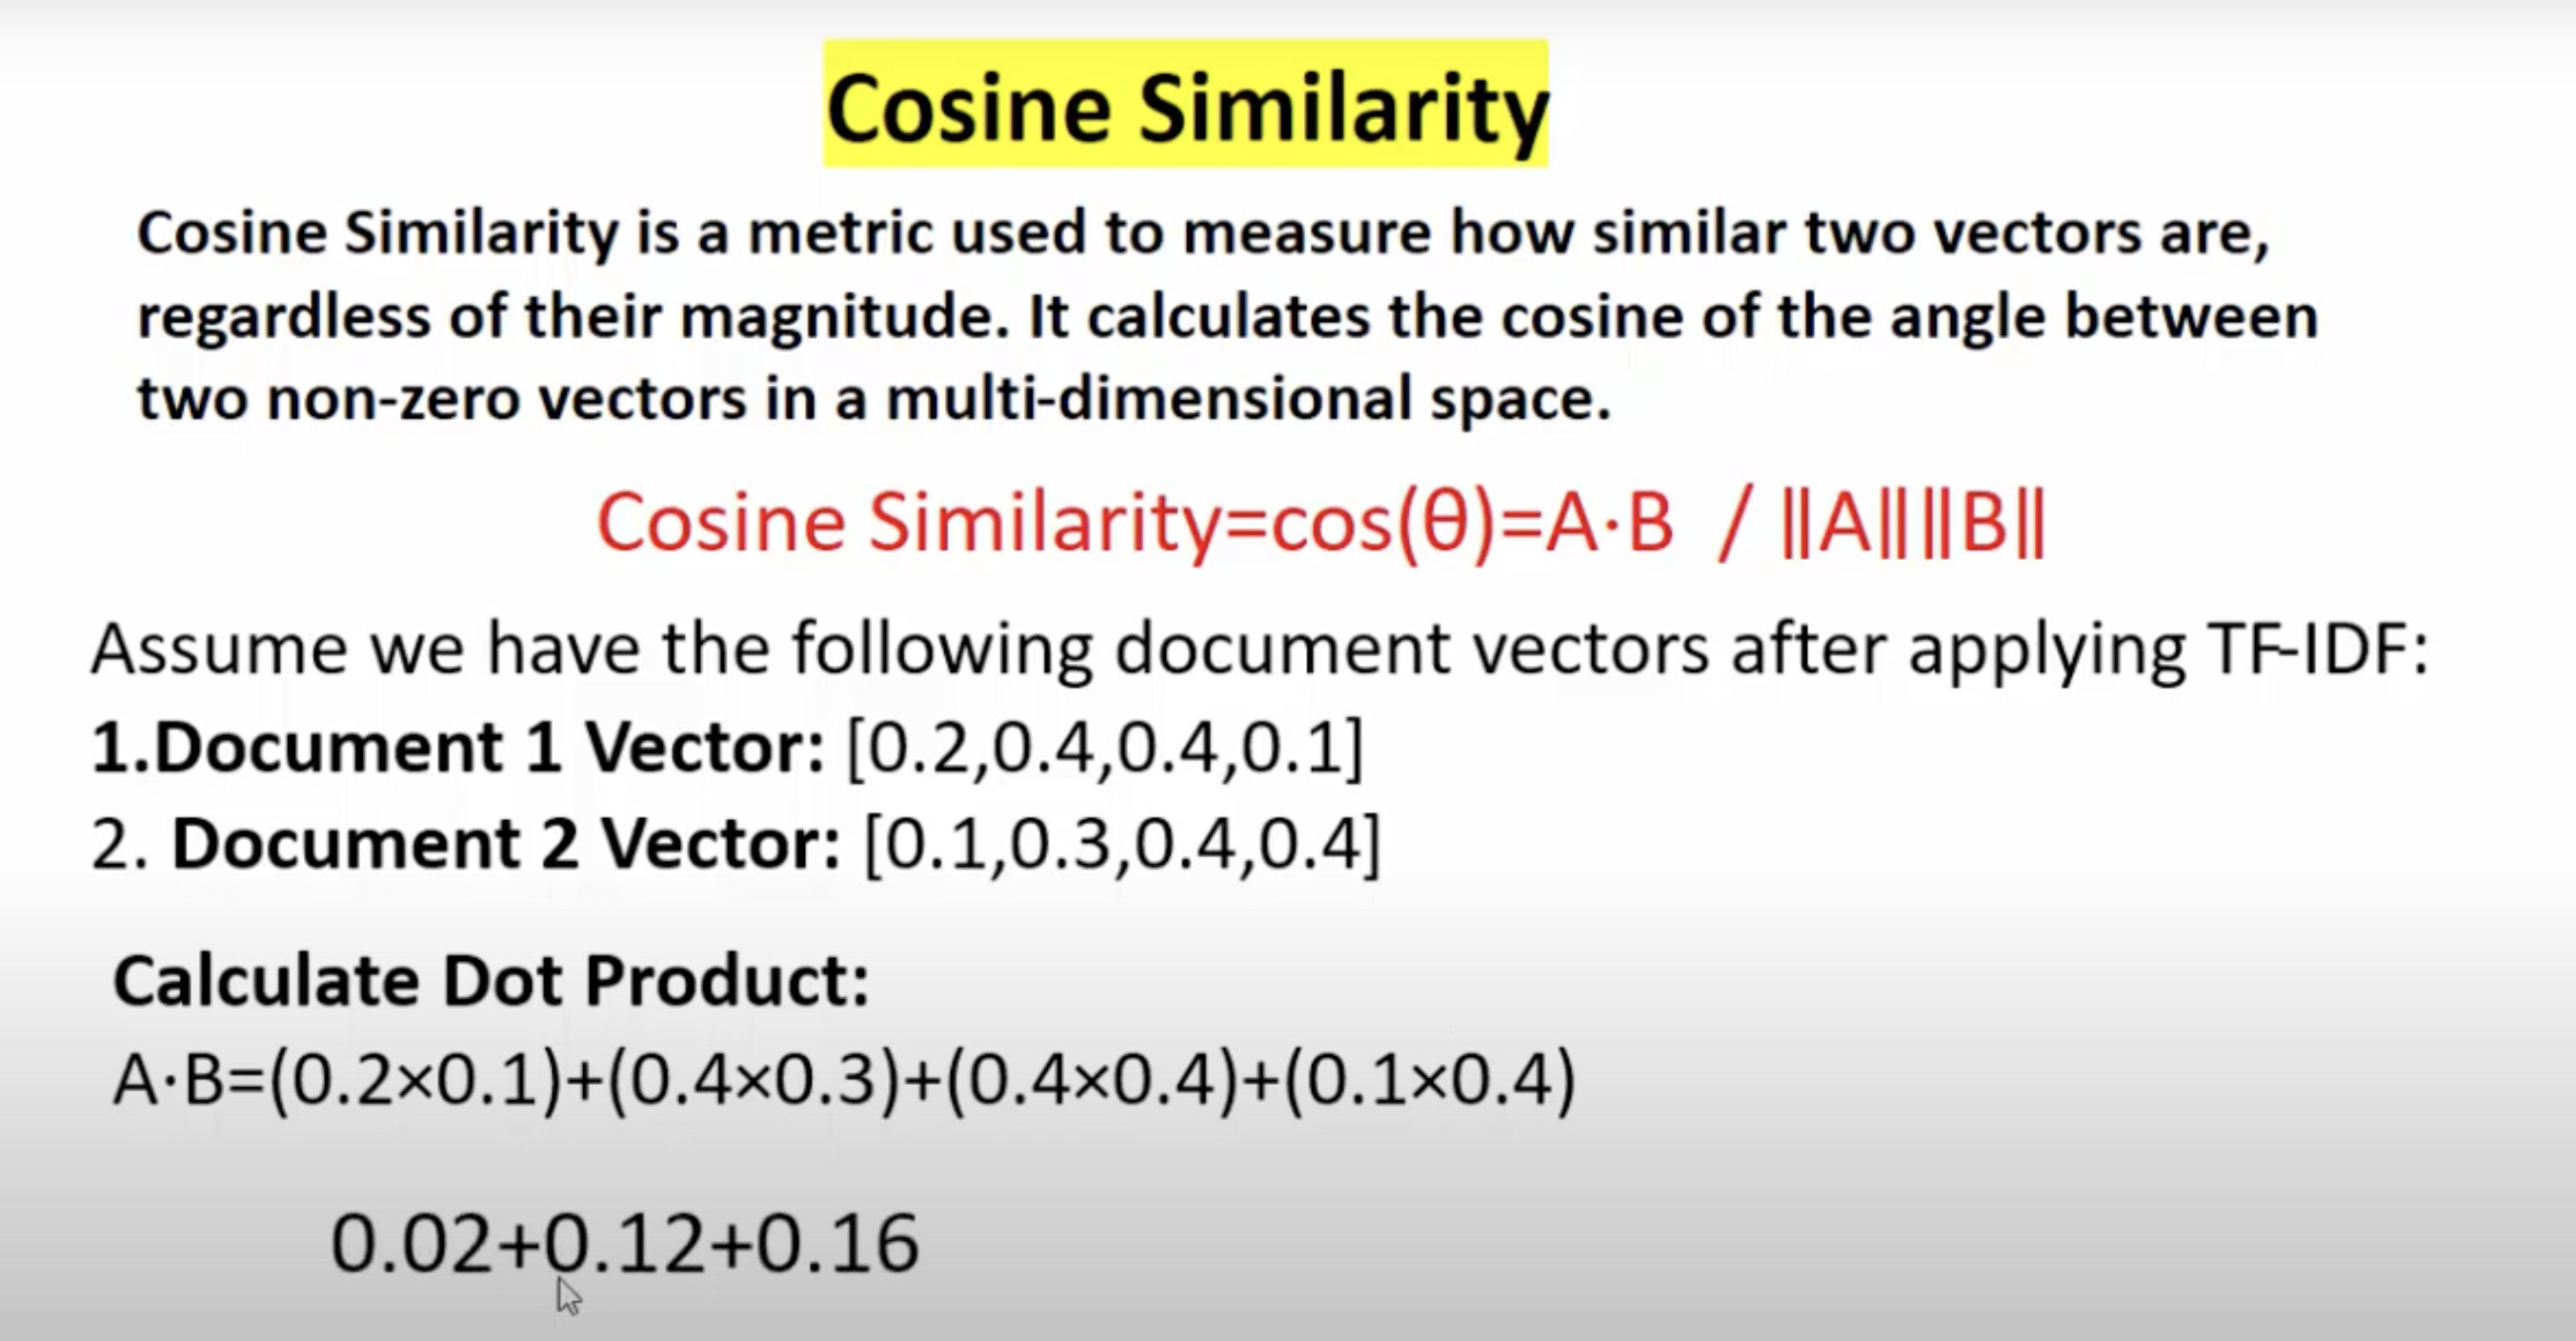

![Screenshot 2024-09-12 at 9.42.48 PM.png](<attachment:Screenshot 2024-09-12 at 9.42.48 PM.png>)
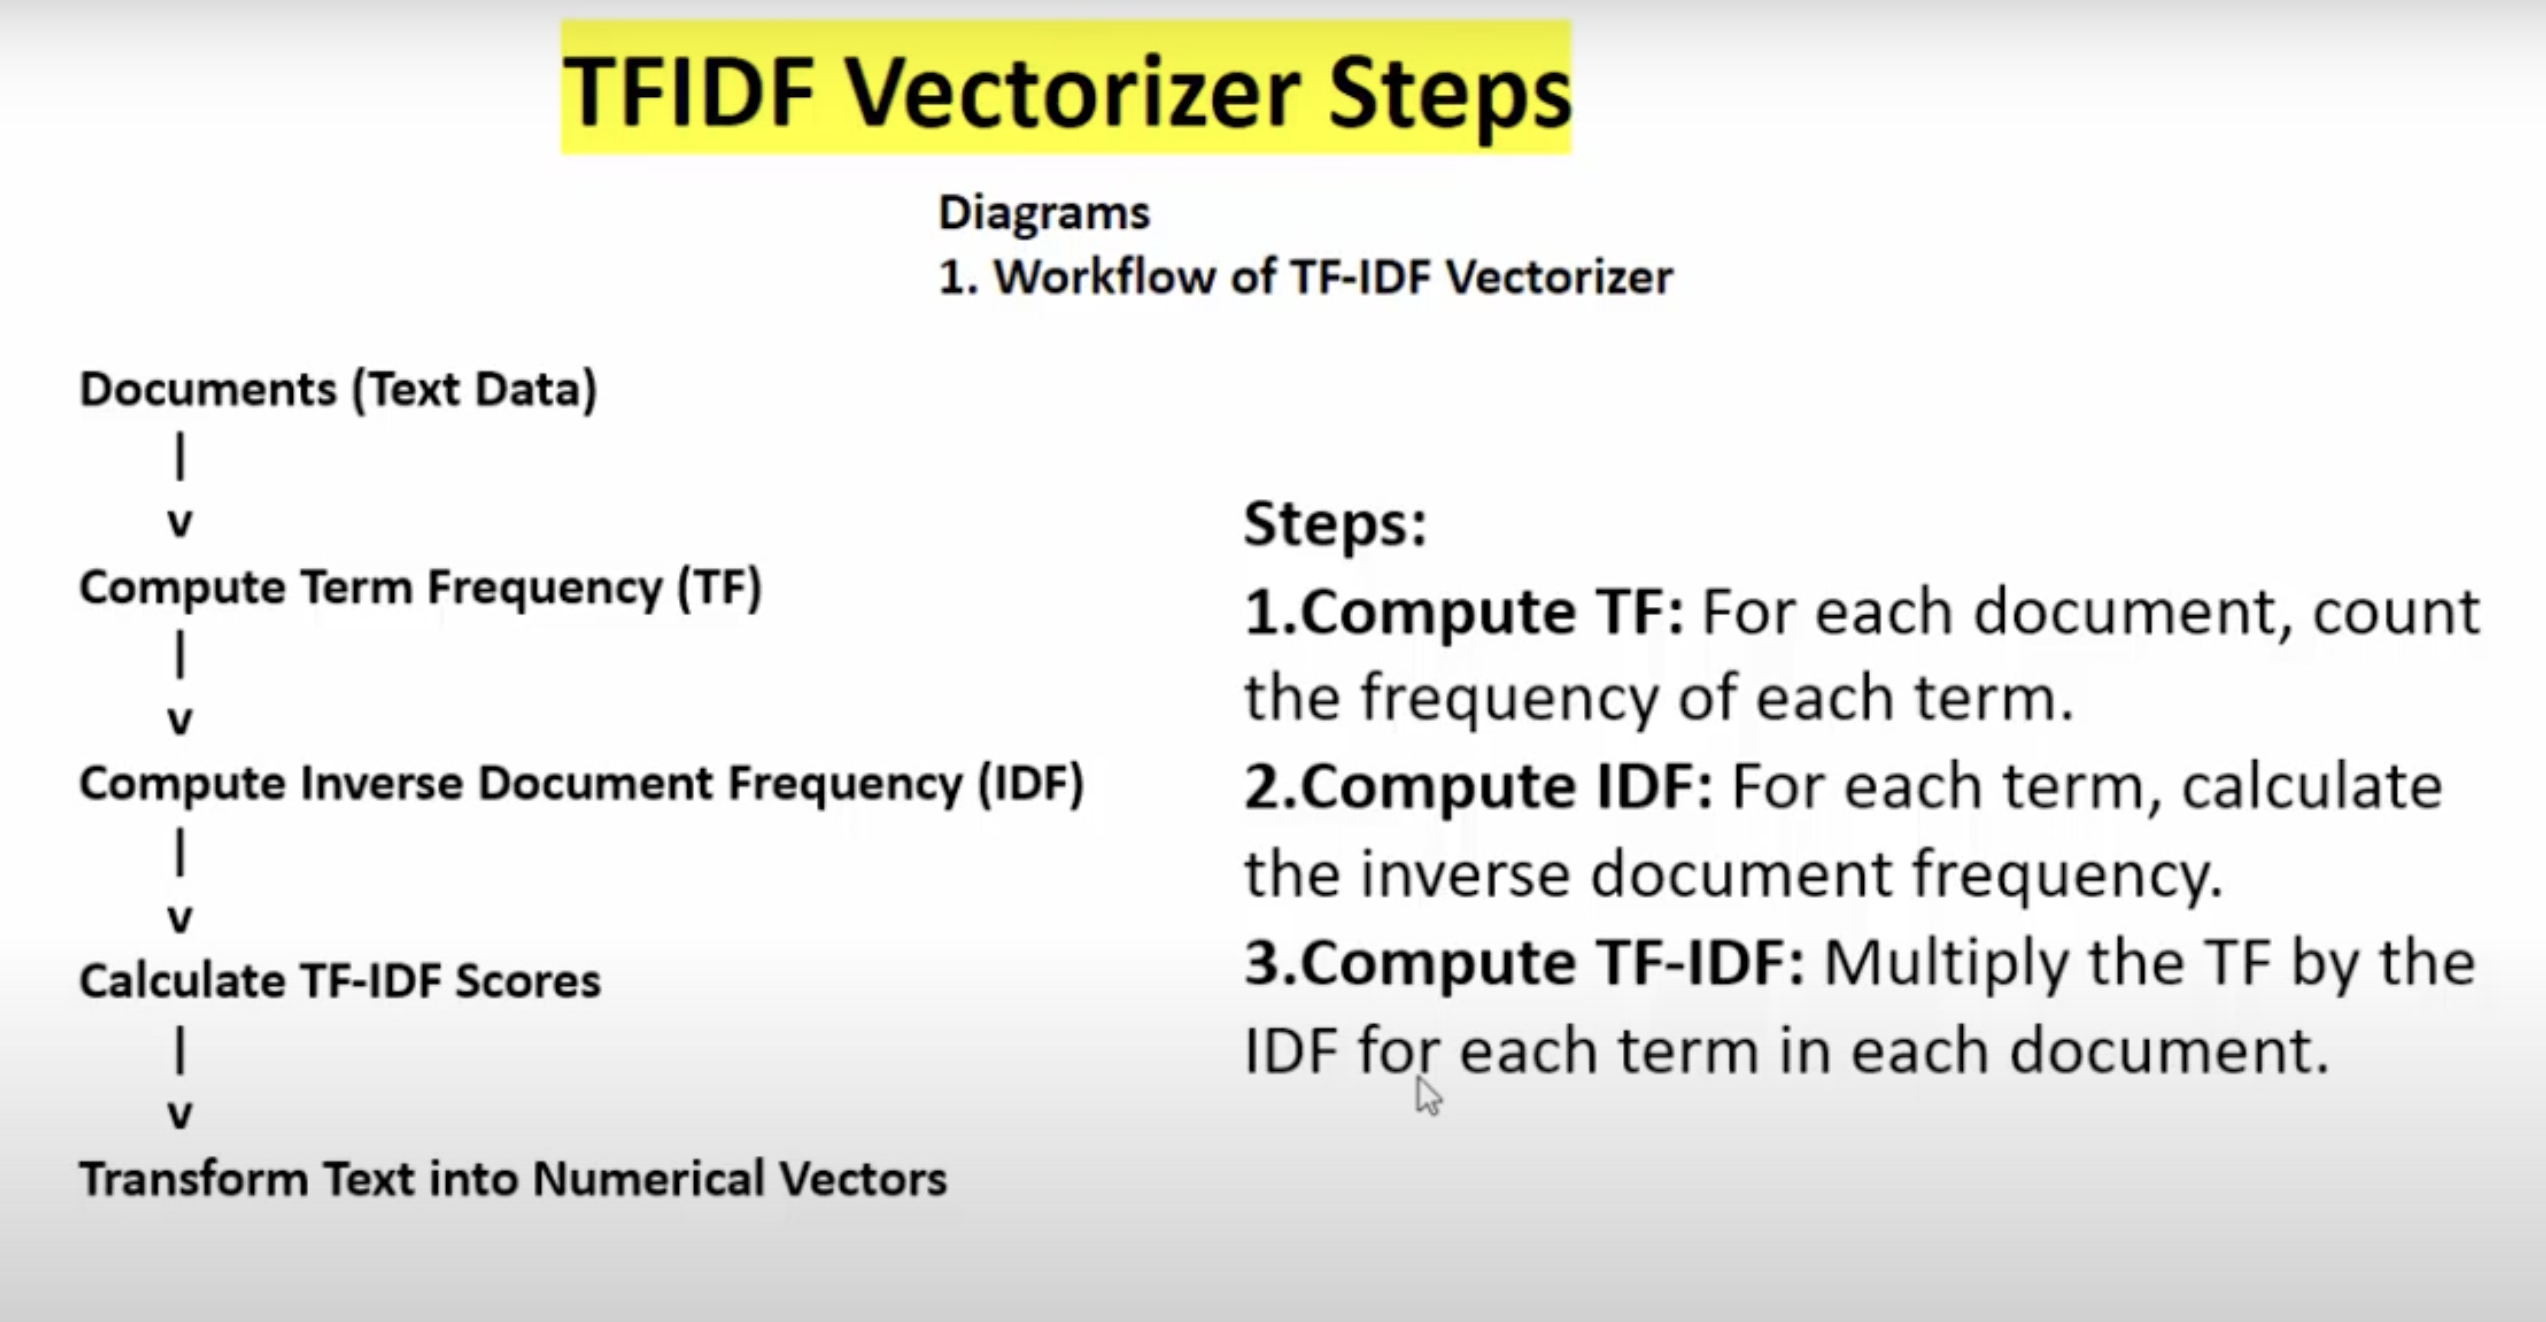

![Screenshot 2024-09-12 at 9.42.57 PM.png](<attachment:Screenshot 2024-09-12 at 9.42.57 PM.png>)
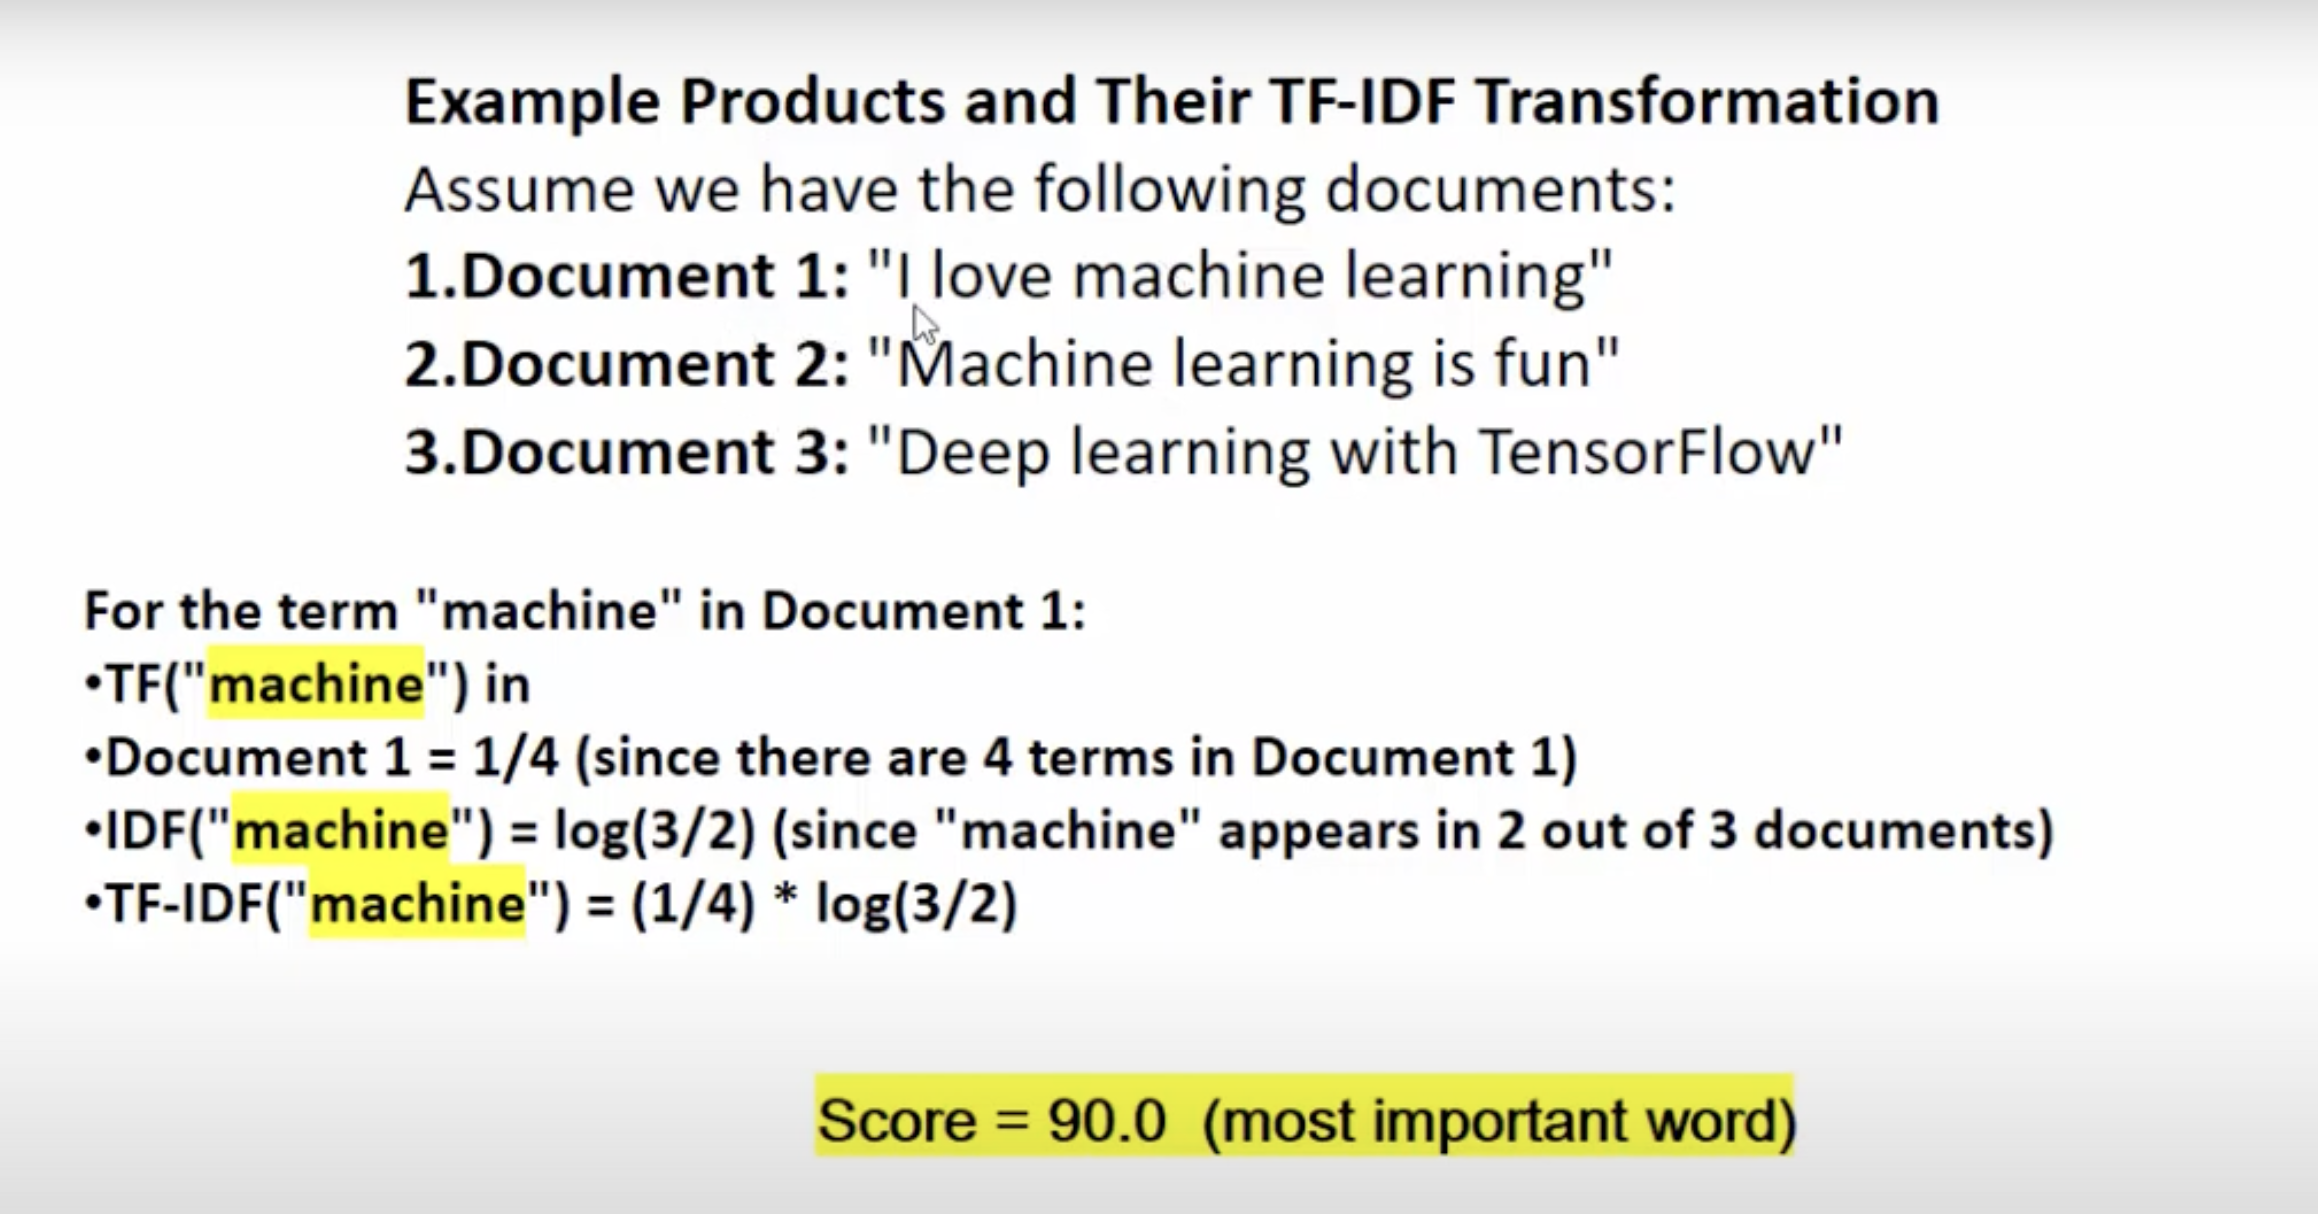

In [14]:
# tfid vectorizer object with english stop words
tfid_vectorizer = TfidfVectorizer(stop_words="english")

# fitting the data to the tfidvectorizer 
tfidf_matrix_content = tfid_vectorizer.fit_transform(train_data["Tags"])

In [15]:
#finding cosine similarity for the vectors
cosine_similarity_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

In [16]:
# each list is the cosine similartiy of one vector with all the other vectors
cosine_similarity_content

array([[1.        , 0.01317493, 0.01182614, ..., 0.10132348, 0.01249521,
        0.04414909],
       [0.01317493, 1.        , 0.40297257, ..., 0.00605861, 0.01205174,
        0.04258219],
       [0.01182614, 0.40297257, 1.        , ..., 0.03722526, 0.01081794,
        0.03822285],
       ...,
       [0.10132348, 0.00605861, 0.03722526, ..., 1.        , 0.00574604,
        0.02030237],
       [0.01249521, 0.01205174, 0.01081794, ..., 0.00574604, 1.        ,
        0.04038529],
       [0.04414909, 0.04258219, 0.03822285, ..., 0.02030237, 0.04038529,
        1.        ]])

In [17]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index  =train_data[train_data["Name"] == item_name].index[0]
print(f"the item index for the item_index is stored at index : {item_index}")

the item index for the item_index is stored at index : 0


In [18]:
#getting the cosine vector for the item_name data
print(f"the cosine similartiy vector for the input vector is : \n {list(enumerate(cosine_similarity_content[item_index]))}")
#the below list is the list of the cosine similarityt of the item vector with respect to the other tag vectors
similari_item = list(enumerate(cosine_similarity_content[item_index]))

the cosine similartiy vector for the input vector is : 
 [(0, 1.0000000000000002), (1, 0.013174926471429043), (2, 0.011826144669172494), (3, 0.014725800982130423), (4, 0.007938862609752486), (5, 0.010646596444798736), (6, 0.012108216681164142), (7, 0.1304060548044626), (8, 0.01589754381178025), (9, 0.012059549747699877), (10, 0.013911994487814277), (11, 0.2074632199957864), (12, 0.010064334788864782), (13, 0.014380195255258655), (14, 0.010011568426492892), (15, 0.011096593707703314), (16, 0.015021998998432888), (17, 0.009919358521698937), (18, 0.08462292192240438), (19, 0.015682824927823823), (20, 0.011015749566199986), (21, 0.011912155382061217), (22, 0.01316210304702617), (23, 0.013005451156104566), (24, 0.014655891046218289), (25, 0.011061150702121917), (26, 0.015228133667057867), (27, 0.007020508142120105), (28, 0.010547482215258619), (29, 0.01384529446335473), (30, 0.014493397252503358), (31, 0.013221516139968704), (32, 0.020257934269408667), (33, 0.010970487852921956), (34, 0.012

In [19]:
# getting the index and list of vector with max cosine similarity
print(f"the most similar items and their index are as follow \n {sorted(similari_item, key=lambda x:x[1], reverse=True)}")

similari_item = sorted(similari_item, key=lambda x:x[1], reverse=True)

the most similar items and their index are as follow 
 [(0, 1.0000000000000002), (4854, 0.5315593602883981), (3052, 0.5136209857880819), (4010, 0.5109506045193593), (4752, 0.5070170167645098), (4356, 0.49739513022125004), (3967, 0.4888551587256253), (2952, 0.47537672609681525), (4966, 0.4750567092702906), (3252, 0.46809814983983045), (1257, 0.4582505809136138), (1896, 0.4541425352986242), (4731, 0.44333176258627394), (237, 0.4420647793399166), (3692, 0.43865367040606434), (2761, 0.432616959468824), (1743, 0.4318519692689533), (790, 0.39074190838470385), (4826, 0.39074190838470385), (3366, 0.3888678982995107), (3852, 0.38113115010400916), (1758, 0.37209017182309767), (3873, 0.3649499460978631), (1215, 0.3604207191970385), (1594, 0.351049579961848), (738, 0.34285406683208275), (2870, 0.33291690510276745), (545, 0.3300162370562591), (2484, 0.32935422690271476), (2485, 0.32922053012583063), (591, 0.3235769567429304), (2650, 0.3228293429975351), (3101, 0.3209747382344699), (964, 0.318374496

In [20]:
top_similar_items = similari_item[1:10]
print(top_similar_items)


recomended_item_index = [x[0] for x in top_similar_items]

[(4854, 0.5315593602883981), (3052, 0.5136209857880819), (4010, 0.5109506045193593), (4752, 0.5070170167645098), (4356, 0.49739513022125004), (3967, 0.4888551587256253), (2952, 0.47537672609681525), (4966, 0.4750567092702906), (3252, 0.46809814983983045)]


In [21]:
train_data.iloc[recomended_item_index][["Name","ReviewCount"]]

Name  ReviewCount
4854  OPI Infinite Shine Nail Polish, Dulce De Leche...          1.0
3052      OPI Nail Lacquer Nail Polish, Hawaiian Orchid          1.0
4010      OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz          2.0
4752  OPI Infinite Shine Nail Polish, Let Love Spark...          3.0
4356  OPI Nail Lacquer Nail Polish, Go with the Lava...          1.0
3967  OPI Infinite Shine Nail Polish, Mini Scotland ...          1.0
2952           OPI Nail Lacquer Nail Polish, Miami Beet          0.0
4966  OPI Nail GelColor + Infinite Shine Polish -TAU...          0.0
3252         OPI Nail Lacquer Nail Polish, Shorts Story          1.0

# function to recomend product for Content Base

In [22]:
from sklearn.feature_extraction .text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def content_base_recomendataion(train_data, item_name, top_n=10):
    #checking if the item name exist in the training data
    if item_name not in train_data["Name"].values:
        print(f"item {item_name} not found in the tarining data")
        return pd.DataFrame()
    
    #creating a tfid vectorixer for the input 
    tfid_vectorier =TfidfVectorizer(stop_words="english")

    #applying tfidvectorizer to the product descrtiption
    tfid_matrix = tfid_vectorizer.fit_transform(train_data["Tags"])

    #calculating cosine similarity
    cosine_similaritt_content = cosine_similarity(tfid_matrix, tfid_matrix)

    #getting the item index
    item_index = train_data[train_data["Name"] == item_name].index[0]

    #get cosine similarity score
    similar_item = list(enumerate(cosine_similaritt_content[item_index]))

    #sorting similar item in reverse to recomend
    similar_item = sorted(similar_item, key = lambda x:x[1], reverse=True)

    #getting the top  n items
    top_similar_items = similar_item[1: top_n+1]

    #getting indeces top top n items
    recomendation_item_index = [x[0] for x in top_similar_items]

    #get details of top similar items
    recomended_item_detials = train_data.iloc[recomendation_item_index][["Name","ReviewCount"]]

    return  recomended_item_detials

In [23]:
# getting the recomendation 
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_recomendation  = content_base_recomendataion(train_data, item_name, top_n=6)
content_based_recomendation

Name  ReviewCount
4854  OPI Infinite Shine Nail Polish, Dulce De Leche...          1.0
3052      OPI Nail Lacquer Nail Polish, Hawaiian Orchid          1.0
4010      OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz          2.0
4752  OPI Infinite Shine Nail Polish, Let Love Spark...          3.0
4356  OPI Nail Lacquer Nail Polish, Go with the Lava...          1.0
3967  OPI Infinite Shine Nail Polish, Mini Scotland ...          1.0

# colabrative filtering model

In [24]:
train_data

Unnamed: 0            ID  ProdID  Rating  ReviewCount  \
0              0  1.705737e+09     2.0     0.0          0.0   
1              1  9.500000e+01    76.0     0.0          0.0   
2              2  8.000000e+00     8.0     4.5      29221.0   
3              3  4.000000e+00     3.0     0.0          0.0   
4              4  9.900000e+02     3.0     0.0        131.0   
...          ...           ...     ...     ...          ...   
4995        4995  2.771000e+03   208.0     4.5          2.0   
4996        4996  0.000000e+00     1.0     3.9       7484.0   
4997        4997  3.400000e+01    96.0     0.0          4.0   
4998        4998  9.000000e+00     7.0     0.0          0.0   
4999        4999  0.000000e+00     1.0     0.0        438.0   

                                               Category             Brand  \
0     premium, beauty, premium, makeup, premium, nai...               opi   
1     beauty, hair, care, hair, color, auburn, hair,...              easy   
2     beauty, hair, care, hair, color, permanent, ha...           clairol   
3                                   beauty, makeup, lip  kokie, cosmetics   
4     seasonal, stock, essentials, personal, care, s...          gillette   
...                                                 ...               ...   
4995  household, essentials, air, fresheners, spray,...    eclectic, lady   
4996  beauty, hair, care, hair, color, permanent, ha...           garnier   
4997                              beauty, makeup, nails          stoneway   
4998  premium, beauty, premium, bath, body, premium,...             creed   
4999  beauty, makeup, face, makeup, face, makeup, br...         covergirl   

                                                   Name  \
0     OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1     Nice n Easy Permanent Color, 111 Natural Mediu...   
2     Clairol Nice N Easy Permanent Color 7/106A Nat...   
3     Kokie Professional Matte Lipstick, Hot Berry, ...   
4     Gillette TRAC II Plus Razor Blade Refills, Fit...   
...                                                 ...   
4995  Garden Mint Room Spray (Double Strength), 4 ou...   
4996  Garnier Nutrisse Nourishing Hair Color Creme (...   
4997  Nail File Electric Drill, 6 in 1 Professional ...   
4998  Creed Love In Black Hair And Body Wash 6.8oz/2...   
4999                                         Foundation   

                                               ImageURL  \
0     https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1     https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2     https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3     https://i5.walmartimages.com/asr/25b4b467-bc61...   
4     https://i5.walmartimages.com/asr/1a2ebb06-cd01...   
...                                                 ...   
4995  https://i5.walmartimages.com/asr/0e0416ae-6b70...   
4996  https://i5.walmartimages.com/asr/24d7a837-51f8...   
4997  https://i5.walmartimages.com/asr/d6202179-2c93...   
4998  https://i5.walmartimages.com/asr/3dc99239-66d2...   
4999  https://i5.walmartimages.com/asr/a76122fd-322a...   

                                            Description  \
0                                                   NaN   
1     pack, 3, pack, 3, upc, 381519000201, beautiful...   
2     clairol, nice, n, easy, permanent, color, give...   
3     calling, matte, lip, lovers, indulge, rich, cr...   
4     1971, gillette, introduced, trac, ii, razor, s...   
...                                                 ...   
4995  garden, mint, lovely, blend, spearmint, lettuc...   
4996  garnier, nutrisse, nourishing, hair, color, cr...   
4997  multifunctional, nail, drill, kit, come, 6, di...   
4998                                                NaN   
4999  mousse, foundation, gives, smooth, clean, natu...   

                                                   Tags  
0     OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1     Nice 'n Easy Permanent Color, 111 Natural Medi...  
2     Clairol Nice 'N E

In [25]:
train_data.head()

Unnamed: 0            ID  ProdID  Rating  ReviewCount  \
0           0  1.705737e+09     2.0     0.0          0.0   
1           1  9.500000e+01    76.0     0.0          0.0   
2           2  8.000000e+00     8.0     4.5      29221.0   
3           3  4.000000e+00     3.0     0.0          0.0   
4           4  9.900000e+02     3.0     0.0        131.0   

                                            Category             Brand  \
0  premium, beauty, premium, makeup, premium, nai...               opi   
1  beauty, hair, care, hair, color, auburn, hair,...              easy   
2  beauty, hair, care, hair, color, permanent, ha...           clairol   
3                                beauty, makeup, lip  kokie, cosmetics   
4  seasonal, stock, essentials, personal, care, s...          gillette   

                                                Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                         Description  \
0                                                NaN   
1  pack, 3, pack, 3, upc, 381519000201, beautiful...   
2  clairol, nice, n, easy, permanent, color, give...   
3  calling, matte, lip, lovers, indulge, rich, cr...   
4  1971, gillette, introduced, trac, ii, razor, s...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

In [28]:
user_item_matrix = train_data.pivot_table(index='ID',columns="ProdID", values="Rating",aggfunc="mean").fillna(0).astype(int)

In [30]:
user_item_matrix.head()

ProdID  0.000000e+00  1.000000e+00  2.000000e+00  3.000000e+00  4.000000e+00  \
ID                                                                             
0.0                2             1             2             1             1   
1.0                1             0             2             2             0   
2.0                1             1             3             1             2   
3.0                1             1             1             2             0   
4.0                3             0             2             1             1   

ProdID  5.000000e+00  6.000000e+00  7.000000e+00  8.000000e+00  9.000000e+00  \
ID                                                                             
0.0                0             2             1             1             1   
1.0                2             3             2             0             2   
2.0                1             0             2             1             1   
3.0                3             1             0             0             3   
4.0                1             0             2             1             3   

ProdID  ...  1.007940e+42  1.007940e+42  1.008730e+42  1.030521e+42  \
ID      ...                                                           
0.0     ...             0             0             0             0   
1.0     ...             0             4             0             0   
2.0     ...             0             3             0             0   
3.0     ...             0             0             0             0   
4.0     ...             0             1             0             0   

ProdID  1.030521e+42  1.030521e+42  1.076430e+42  3.002240e+42  5.002240e+42  \
ID                                                                             
0.0                0             0             5             0             0   
1.0                5             0             0             0             0   
2.0                0             0             0             0             0   
3.0                0             0             0             0             0   
4.0                0             0             0             0             0   

ProdID  5.005509e+42  
ID                    
0.0                0  
1.0                0  
2.0                4  
3.0                0  
4.0                0  

[5 rows x 1697 columns]

In [32]:
user_similarity = cosine_similarity(user_item_matrix)

In [33]:
user_similarity[:5]

array([[1.        , 0.08328508, 0.08776176, ..., 0.        , 0.03388371,
        0.        ],
       [0.08328508, 1.        , 0.09334828, ..., 0.        , 0.        ,
        0.        ],
       [0.08776176, 0.09334828, 1.        , ..., 0.        , 0.0417756 ,
        0.        ],
       [0.10210798, 0.12425241, 0.04346205, ..., 0.        , 0.        ,
        0.        ],
       [0.0675362 , 0.0920999 , 0.044717  , ..., 0.        , 0.03691067,
        0.        ]])

In [34]:
target_user_id = 4

In [36]:
target_user_index  = user_item_matrix.index.get_loc(target_user_id)


In [37]:
user_similarites = user_similarity[target_user_index]
user_similarites

array([0.0675362 , 0.0920999 , 0.044717  , ..., 0.        , 0.03691067,
       0.        ])

In [41]:
#sorting the user_similarities in sorting order
similar_user_index = user_similarites.argsort()[::-1][1:]
similar_user_index[:5]

array([  84, 1552,  702, 1501,  266])

In [48]:
recomended_items = []

for user_index in similar_user_index:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    #getting product not rated by target user
    not_rated_by_target_user = (rated_by_similar_user == 0 ) & (user_item_matrix.iloc[target_user_index]==0)

    recomended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recomended_items_details = train_data[train_data["ProdID"].isin(recomended_items)][["Name","ReviewCount","Brand","ImageURL"]]
    

Name  ReviewCount  \
15    Clairol Natural Instincts Demi-Permanent Hair ...       2935.0   
33    DenTek Kids Fun Flossers, Removes Food & Plaqu...          3.0   
61    COVERGIRL Exhibitionist Cream Lipstick, 395 Da...        713.0   
64    Neutrogena SkinClearing Oil-Free Liquid Founda...        741.0   
69    Design Essentials Natural Coconut & Monoi Curl...          1.0   
...                                                 ...          ...   
4983  Covidien Simplicity Underpad - 7136CS - 23&quo...          0.0   
4987  2oz - Artizen Breathe Blend Essential Oil (100...          1.0   
4990  2 Pack - Crest 3D White Brilliance Fluoride An...         43.0   
4996  Garnier Nutrisse Nourishing Hair Color Creme (...       7484.0   
4999                                         Foundation        438.0   

                   Brand                                           ImageURL  
15               clairol  https://i5.walmartimages.com/asr/00a6e54a-e431...  
33                dentek  https://i5.walmartimages.com/asr/de6e52eb-6e18...  
61             covergirl  https://i5.walmartimages.com/asr/95076ec0-ffbd...  
64            neutrogena  https://i5.walmartimages.com/asr/fd4d78d8-310a...  
69    design, essentials  https://i5.walmartimages.com/asr/ff2dba1d-0c02...  
...                  ...                                                ...  
4983            covidien  https://i5.walmartimages.com/asr/2b5ce91e-7b16...  
4987             artizen  https://i5.walmartimages.com/asr/99ddd317-013e...  
4990               crest  https://i5.walmartimages.com/asr/5758fbaf-5515...  
4996             garnier  https://i5.walmartimages.com/asr/24d7a837-51f8...  
4999           covergirl  https://i5.walmartimages.com/asr/a76122fd-322a...  

[547 rows x 4 columns]

In [49]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


Name  ReviewCount  \
61   COVERGIRL Exhibitionist Cream Lipstick, 395 Da...        713.0   
85   BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct          3.0   
86   LOreal Paris Feria Multi-Faceted Shimmering Pe...       2144.0   
108  OPI Nail Dipping Powder Perfection Combo - Liq...          1.0   
144  Covidien Curity Maternity Pad Heavy 4.33&quot ...          0.0   
155  Crest 3D White Brilliance Mouthwash, Alcohol F...         63.0   
174  COVERGIRL Outlast All-Day Moisturizing Lip Col...         36.0   
193  Revlon ColorStay Skinny Liquid Liner, 304 Gree...         70.0   
212  Comvita Certified UMF 20+ Manuka Honey, Raw & ...          0.0   
241              Ahava Mens Mineral Hand Cream, 3.4 Oz          0.0   

         Brand                                           ImageURL  Rating  
61   covergirl  https://i5.walmartimages.com/asr/95076ec0-ffbd...     4.3  
85    bioastin  https://i5.walmartimages.com/asr/6da9e238-b19e...     5.0  
86       paris  https://i5.walmartimages.com/asr/c229026a-2b75...     3.1  
108        opi  https://i5.walmartimages.com/asr/ef1607ee-5bdb...     3.0  
144   covidien  https://i5.walmartimages.com/asr/e4e38217-ed43...     0.0  
155      crest  https://i5.walmartimages.com/asr/1fcc5525-9ae3...     0.0  
174  covergirl  https://i5.walmartimages.com/asr/4479896f-c6c4...     0.0  
193     revlon  https://i5.walmartimages.com/asr/aa3b20a6-3d6d...     4.5  
212    comvita  https://i5.walmartimages.com/asr/3cdc1498-a2ac...     0.0  
241      ahava  https://i5.walmartimages.com/asr/f74e4bb7-47d3...     0.0